In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

diabetes_df = pd.read_csv('diabetes_.csv')

In [2]:
print("First few rows of the dataframe:")
print(diabetes_df.head())

print("\nThe data types of the dataframe:")
print(diabetes_df.dtypes)

print("\nThe summary statistics of the dataframe:")
print(diabetes_df.describe())

print("\nThe missing values of the dataframe:")
print(diabetes_df.isnull().sum())

First few rows of the dataframe:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

The data types of the dataframe:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunc

In [3]:
missing_info = diabetes_df.isnull().sum() / len(diabetes_df) * 100

for column in diabetes_df.columns:
  if missing_info[column] > 10: 
    diabetes_df[column].fillna(diabetes_df[column].mean(), inplace=True)
  else: 
    diabetes_df.dropna(subset=[column], inplace=True)

print("\nMissing values after processing:\n", diabetes_df.isnull().sum())



Missing values after processing:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
X = diabetes_df.drop(columns=['Outcome']).values
y = diabetes_df['Outcome'].values

In [5]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) 
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]

  # X_train = X_train.astype(np.int64)
  # X_test = X_test.astype(np.int64)
  # y_train = y_train.astype(np.int64)
  # y_test = y_test.astype(np.int64)
  return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [6]:
def euclidean_distance(point1, point2):
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance


def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

try:
 
  X_test_sample = X_test[:5] 
  y_test_sample = y_test[:5] 

  predictions = knn_predict(X_test_sample, X_train, y_train, k=3)

  print("Predictions:", predictions)
  print("Actual labels:", y_test_sample)
 
  assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test case passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


In [7]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy*100

try:
  y_pred = knn_predict(X_test, X_train, y_train, k=3)
  accuracy = compute_accuracy(y_test, y_pred)
except Exception as e:
  print(f"An unexpected error occurred: {e}")

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 67.39%


In [8]:
from sklearn.preprocessing import MinMaxScaler

# 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X_scaled, y, test_size=0.3)



In [9]:

predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=3)
accuracy_scaled = compute_accuracy(y_test_scaled, predictions_scaled)

print(f"Accuracy on Scaled Data (k=3): {accuracy_scaled:.2f}%")


Accuracy on Scaled Data (k=3): 69.13%


In [10]:
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)
accuracies_original = []
accuracies_scaled = []
times_original = []
times_scaled = []

for k in k_values:
  
    start = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k)
    times_original.append(time.time() - start)
    accuracies_original.append(compute_accuracy(y_test, predictions))


    start = time.time()
    predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k)
    times_scaled.append(time.time() - start)
    accuracies_scaled.append(compute_accuracy(y_test_scaled, predictions_scaled))


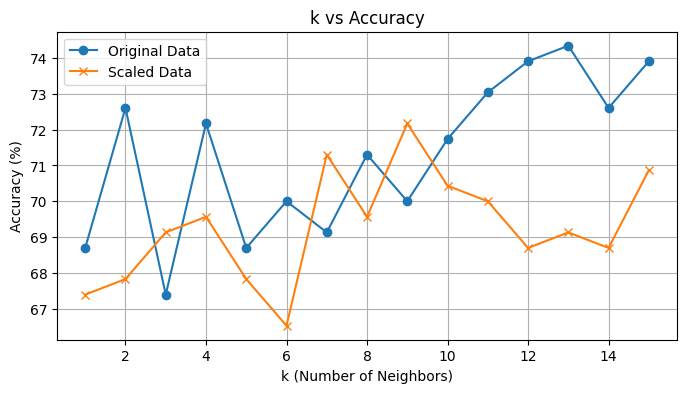

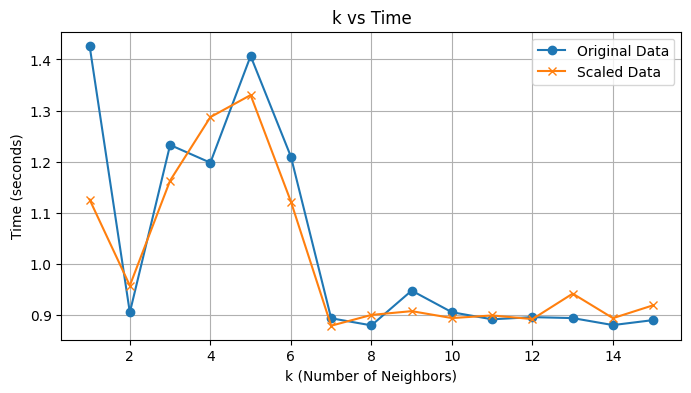

In [11]:

plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies_original, label='Original Data', marker='o')
plt.plot(k_values, accuracies_scaled, label='Scaled Data', marker='x')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(k_values, times_original, label='Original Data', marker='o')
plt.plot(k_values, times_scaled, label='Scaled Data', marker='x')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (seconds)')
plt.title('k vs Time')
plt.legend()
plt.grid(True)
plt.show()